<a href="https://colab.research.google.com/github/NishchalSrinarayanan/WeatherAndStockCode/blob/main/proj(full).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import sqlite3
import requests


api_key = "WFGXXTG1LQWDEUA2"
symbol = "AAPL"


url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}"
data = requests.get(url).json()


time_series = data.get("Time Series (Daily)", {})

conn = sqlite3.connect("stocks.db")
cursor = conn.cursor()


cursor.execute("""
    CREATE TABLE stocks (
        date TEXT,
        open DECIMAL,
        high DECIMAL,
        low DECIMAL,
        close DECIMAL,
        volume DECIMAL
    )
""")

for date, values in time_series.items():
    cursor.execute("""
        INSERT INTO stocks (date, open, high, low, close, volume)
        VALUES (?, ?, ?, ?, ?, ?)
    """, (
        date,
        float(values["1. open"]),
        float(values["2. high"]),
        float(values["3. low"]),
        float(values["4. close"]),
        int(values["5. volume"])
    ))

# Commit and close connection
conn.commit()
conn.close()



In [11]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("stocks.db")
cursor = conn.cursor()
cursor.execute("SELECT * FROM stocks;")

# Fetch all data
data = cursor.fetchall()

# Get column names
columns = [description[0] for description in cursor.description]

# Create pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Print the DataFrame (which displays as a table)
print(df)



          date     open     high       low   close    volume
0   2025-03-27  221.390  224.990  220.5601  223.85  37094774
1   2025-03-26  223.510  225.020  220.4700  221.53  34532656
2   2025-03-25  220.770  224.100  220.0800  223.75  34493583
3   2025-03-24  221.000  221.480  218.5800  220.73  44299483
4   2025-03-21  211.560  218.840  211.2800  218.27  94127768
..         ...      ...      ...       ...     ...       ...
95  2024-11-06  222.610  226.065  221.1900  222.72  54561121
96  2024-11-05  221.795  223.950  221.1400  223.45  28111338
97  2024-11-04  220.990  222.790  219.7100  222.01  44944468
98  2024-11-01  220.965  225.350  220.2700  222.91  65276741
99  2024-10-31  229.340  229.830  225.3700  225.91  64370086

[100 rows x 6 columns]


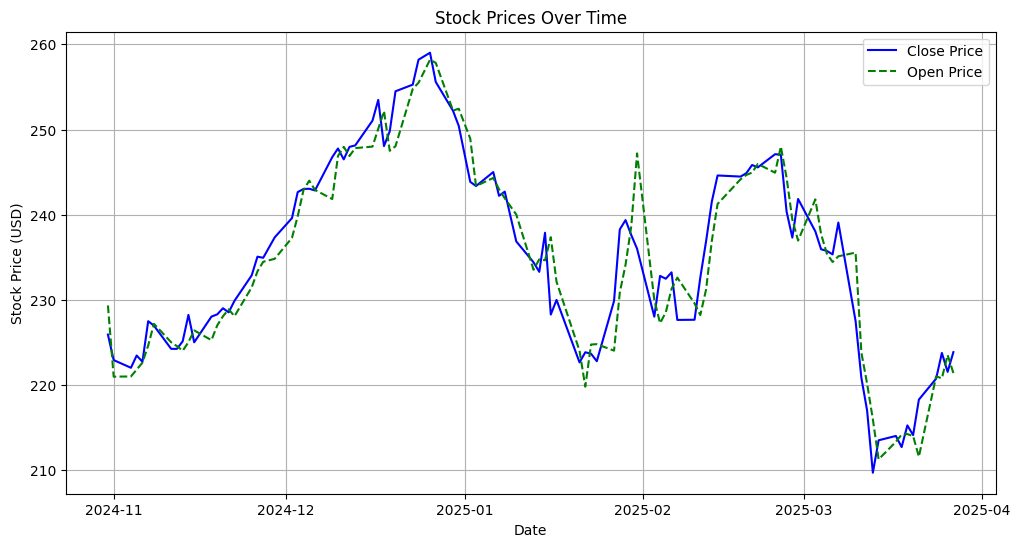

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("stocks.db")
cursor = conn.cursor()

# Fetch stock data
cursor.execute("SELECT date, open, high, low, close FROM stocks")
data = cursor.fetchall()

# Close the connection
conn.close()

# Convert data to a Pandas DataFrame
columns = ["date", "open", "high", "low", "close"]
df = pd.DataFrame(data, columns=columns)

# Convert date column to datetime for better plotting
df["date"] = pd.to_datetime(df["date"])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["close"], label="Close Price", color="blue")
plt.plot(df["date"], df["open"], label="Open Price", color="green", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Stock Prices Over Time")
plt.legend()
plt.grid(True)
# Show the plot
plt.show()
